In [15]:
import uproot
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root
from matplotlib import rc

# plt.rcParams['text.usetex'] = True
pd.set_option('use_inf_as_na', False)


def midpoints(hvals):
    hvals_shift=np.append(hvals[1:],0)

    midp=(hvals+hvals_shift)/2.0
    return midp[:-1]

font = {'family': 'sanserif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SF_PS2=np.array([0.5,1])

## Inspect what variables are inside the file

In [3]:
# file = uproot.open("/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Gamma_v3/output3.root")
# # print(file.keys())
# print(file['PhaseSpace'].keys())
# file = uproot.open("/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Gamma_v3/output3.root")
# # print(file.keys())
# print(file['PhaseSpace'].keys())
# file = uproot.open("/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Gamma_v3/output3.root")
# # print(file.keys())
# print(file['PhaseSpace'].keys())
# file = uproot.open("/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Gamma_v3/output3.root")
# # print(file.keys())
# print(file['PhaseSpace'].keys())

## Load root files. 
#### * loads all files 
#### Here I am creating a pandas data frame for each fieldsize/dataset and storing it in a dictionary where you access the pandas

In [2]:
filenames_g=[
    "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Gamma_v3/Skimmed_output_*6.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Gamma_v3/Skimmed_output_6.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Gamma_v3/Skimmed_output_6.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Gamma_v3/Skimmed_output_6.root",\
    "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Elec_v3/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Elec_v3/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Elec_v3/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Elec_v3/Skimmed_output_*.root",\
    "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_ElecFromPhS1/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_ElecFromPhS1/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_ElecFromPhS1/Skimmed_output_*.root"
]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur) 
    if "ElecFromPhS1" in files_g:
        nomo=files_g.split('ElecFromPhS1')
        nomo1=nomo[0]+"Elec_v3"+nomo[1]
#         print(nomo[0]+"Elec_v3"+nomo[1])
        tdf=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
        print(data_frame_dict[nomo1].size)
        data_frame_dict[nomo1]=data_frame_dict[nomo1].append(tdf)
        print(data_frame_dict[nomo1].size)


    else:
        data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is

filenames_g=[
    "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Gamma_v3/Skimmed_output_*6.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Gamma_v3/Skimmed_output_6.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Gamma_v3/Skimmed_output_6.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Gamma_v3/Skimmed_output_6.root",\
    "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Elec_v3/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Elec_v3/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Elec_v3/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Elec_v3/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_ElecFromPhS1/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_ElecFromPhS1/Skimmed_output_*.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_ElecFromPhS1/Skimmed_output_*.root"
]


/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Gamma_v3/Skimmed_output_*6.root   

/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Elec_v3/Skimmed_output_*.root   

/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1/Skimmed_output_*.root   

9806340
19132572


In [21]:
# filenames_g=[
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Gamma_v3/Skimmed_output_*6.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Gamma_v3/Skimmed_output_6.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Gamma_v3/Skimmed_output_6.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Gamma_v3/Skimmed_output_6.root",\
#     "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Elec_v3/Skimmed_output_*.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Elec_v3/Skimmed_output_*.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Elec_v3/Skimmed_output_*.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Elec_v3/Skimmed_output_*.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1/Skimmed_output_*.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_ElecFromPhS1/Skimmed_output_*.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_ElecFromPhS1/Skimmed_output_*.root",\
# #     "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_ElecFromPhS1/Skimmed_output_*.root"
# ]


In [5]:
# for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
for j,files_g in enumerate(filenames_g):

    df=data_frame_dict[files_g]
    data_frame_dict[files_g]['dZ']=np.sqrt(1-(pow(data_frame_dict[files_g]['dX'],2)+pow(data_frame_dict[files_g]['dY'],2)))
    data_frame_dict[files_g]['dXdY']=(data_frame_dict[files_g].dX**2+data_frame_dict[files_g].dY**2)**0.5
    ratioThetaXY=data_frame_dict[files_g].dXdY/data_frame_dict[files_g].dZ
    ratioThetaX=data_frame_dict[files_g].dX/data_frame_dict[files_g].dZ
    ratioThetaY=data_frame_dict[files_g].dY/data_frame_dict[files_g].dZ
    data_frame_dict[files_g]['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaY']=ratioThetaY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['XY']=(data_frame_dict[files_g].X**2+data_frame_dict[files_g].Y**2)**0.5

### Checking how many entries in files with different weights

In [6]:
for files_g in filenames_g:
        name=files_g.split("/")[5]
        print(files_g.split("/")[5])
        print(name.split("_")[3])

PhS2_10x10_p1_Gamma_v3
Gamma
PhS2_10x10_p1_Elec_v3
Elec


<ipython-input-16-963dadf8dd5e>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y,x,_=plt.hist(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaY'],density=True,histtype='step',bins=(80),label=name)


ValueError: cannot reindex from a duplicate axis

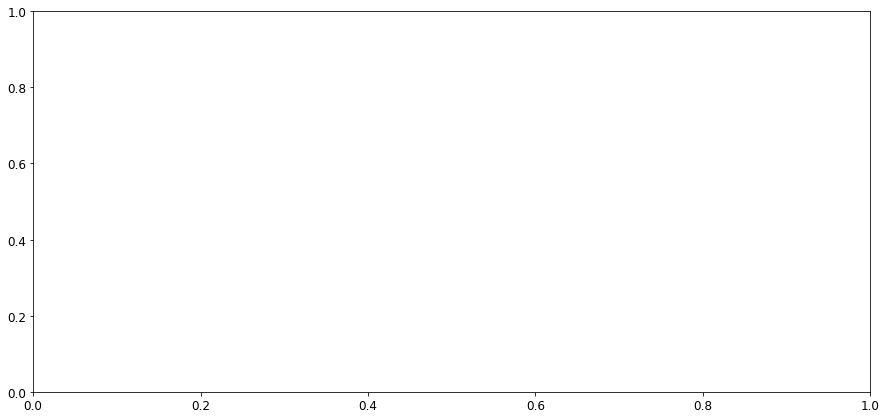

In [16]:
fig,ax=plt.subplots(1,1,figsize=(15,7))

for files_g in filenames_g:
    if "Gamma" in files_g:
        continue

    name=files_g.split("/")[5]
    name=name.split("_")[1]+name.split("_")[3]
    df=data_frame_dict[files_g]
    y,x,_=plt.hist(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaY'],density=True,histtype='step',bins=(80),label=name)

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()
fig.savefig("Phase2_Ekine_all.png")


In [11]:
print(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())

[ 7.35892729 53.28182684  7.54934    ...  2.88928848  2.95837201
 17.04854478]


<ipython-input-11-51678e8eb10f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())
<ipython-input-11-51678e8eb10f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())
<ipython-input-11-51678e8eb10f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())


<ipython-input-12-67f373350101>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  both=np.append(both,df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())
<ipython-input-12-67f373350101>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  both=np.append(both,df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())
<ipython-input-12-67f373350101>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  both=np.append(both,df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())
<ipython-input-12-67f373350101>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  both=np.append(both,df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())
<ipython-input-12-67f373350101>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  both=np.append(both,df[df['X']<10][df['X']>-10

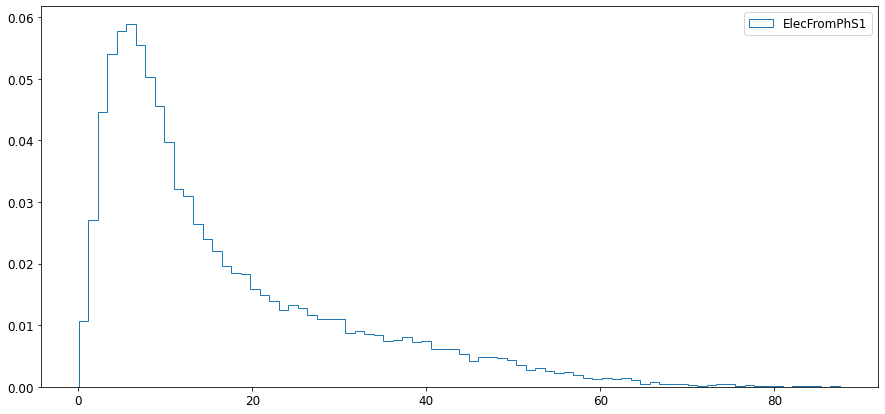

In [12]:
fig,ax=plt.subplots(1,1,figsize=(15,7))
both=np.array([])

for files_g in filenames_g:
    if "Gamma" in files_g:
        continue
    if "10x10" not in files_g:
        continue
    name=files_g.split("/")[5]
    name=name.split("_")[3]
    df=data_frame_dict[files_g]
    both=np.append(both,df[df['X']<10][df['X']>-10][df['Y']<10][df['Y']>-10]['thetaXY'].to_numpy())
y,x,_=plt.hist(both,density=True,histtype='step',bins=(80),label=name)

    
# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()
fig.savefig("Phase2_Ekine_all.png")

In [6]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['Weight'].value_counts())

1.0    634225
Name: Weight, dtype: int64
1.0    2778829
Name: Weight, dtype: int64
1.0    6634819
Name: Weight, dtype: int64
1.0    12618049
Name: Weight, dtype: int64
1.0    8177
Name: Weight, dtype: int64
1.0    35211
Name: Weight, dtype: int64
1.0    71835
Name: Weight, dtype: int64
1.0    113100
Name: Weight, dtype: int64
1.0    1584
Name: Weight, dtype: int64
1.0    8274
Name: Weight, dtype: int64
1.0    18400
Name: Weight, dtype: int64
1.0    30184
Name: Weight, dtype: int64


### ..and total entries (without taking into account the weight)

In [7]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['X'].count())

634225
2778829
6634819
12618049
8177
35211
71835
113100
1584
8274
18400
30184


In [8]:
for files_g in filenames_g:
    sub_area=data_frame_dict[files_g]['X'][abs(data_frame_dict[files_g]['X'])<20][abs(data_frame_dict[files_g]['Y'])<20].count()
    total_area=data_frame_dict[files_g]['X'].count()
    print(sub_area,total_area,sub_area/total_area)

362598 634225 0.5717182387953802
368652 2778829 0.1326645144411549
368967 6634819 0.055610710706652286
368236 12618049 0.029183275481019292
2293 8177 0.28042069218539806
3851 35211 0.10936923120615717
4257 71835 0.059260806013781586
4145 113100 0.036648983200707336
636 1584 0.4015151515151515
1060 8274 0.12811215856901137
1242 18400 0.0675
1258 30184 0.041677710045056986


### ..and with the weight, so we take into account the biasing 

In [9]:
for files_g in filenames_g:
    df=data_frame_dict[files_g]
    print(df['Weight'].sum(axis = 0, skipna = True) ) 
    #skipping if there are any NANs


634225.0
2778829.0
6634819.0
12618049.0
8177.0
35211.0
71835.0
113100.0
1584.0
8274.0
18400.0
30184.0


In [10]:
# # for files_g in filenames_g:
# plt.subplots(1,1,figsize=(19,4))
# # creating a temporary dataframe to hold the one we're currently interating over
# df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Elec_v2/Skimmed_output*.root"]
# df['ProductionVolume']=df['ProductionVolume'].astype('str')

# # plt.hist(df['ProductionVolume'])
# # print(df.dtypes)
# # df['ProductionVolume']=df['ProductionVolume'].astype('str')
# # print(df.dtypes)

# df['Weight'].astype('float16')
# # print(df.dtypes)

# # print(df2)
# # _=plt.hist(df3)
# #     plt.xlim(-100,100)
# #     plt.ylim(-100,100)
# #     plt.xlabel('X')
# #     plt.ylabel('Y')
# #     plt.colorbar()
# # plt.show()
# # df2=df['ProductionVolume']
# # print(df['ProductionVolume'].dtypes)
# # df['ProductionVolume']=df['ProductionVolume'].astype('str')
# # print(df['ProductionVolume'].dtypes)

# _=plt.hist(df['ProductionVolume'])

### Plotting XY plane distributed electrons

0
0.5


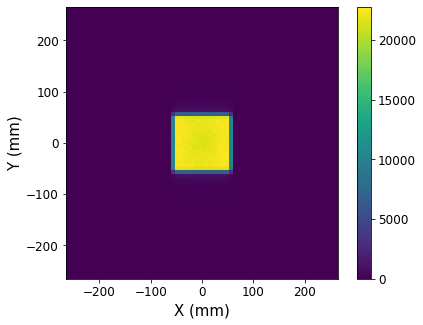

1
1.0


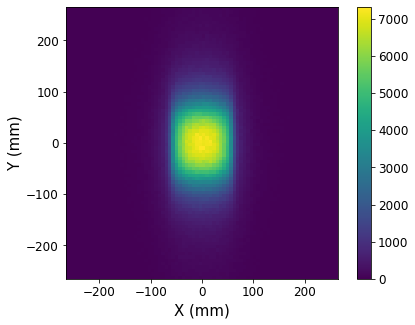

In [24]:
for j,files_g in enumerate(filenames_g):
#     if j>0:
#         continue
    print(j)
    print(SF_PS2[j])
    fig,ax=plt.subplots(1,1,figsize=(7,5))
    df=data_frame_dict[files_g]
    weights_array=np.ones(len(df['X']))
    weights_array*=SF_PS2[j]
    hist=plt.hist2d(df['X'],df['Y'],weights=weights_array,bins=(80,80),vmin=0,range=[[-125,125],[-125,125]]) #range=[[-100,100],[-100,100]]
    plt.clf()
    plt.imshow(hist[0],extent=[-265,265,-265,265],vmin=0)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.colorbar()
    plt.show()
    plt.pause(0.01)
    field=files_g.split("_")[1]
    if "amma" in files_g:
        particle="gamma"
    else:
        particle="electron"
    fig.savefig(f"../PaperImages/Paper_PhS2XY_{particle}.png")

In [ ]:
plt.imshow(hist[0],extent=[-265,265,-265,265],vmin=0)


In [ ]:
for j,files_g in enumerate(filenames_g):
#     if j>0:
#         continue
#     fig,ax=plt.subplots(1,1,figsize=(6,5))
    df=data_frame_dict[files_g]
    hist=plt.hist2d(df['X'],df['Y'],bins=(200,200),range=[[-125,125],[-125,125]],vmin=0) #range=[[-100,100],[-100,100]]
    plt.imshow(hist[0],extent=[-265,265,-265,265],vmin=0)
    plt.show()
    plt.pause(0.01)

In [ ]:
print(hist[0])
plt.imshow(hist[0],extent=[-265,265,-265,265],vmin=0)
plt.show()
plt.pause(0.01)


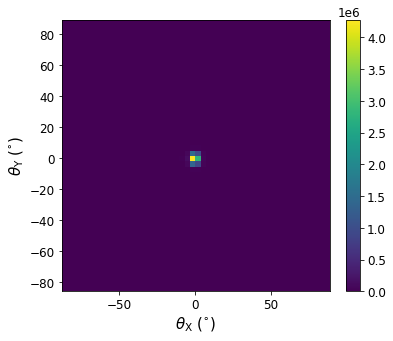

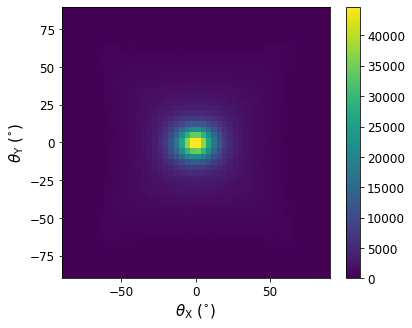

In [48]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    weights_array=np.ones(len(df['X']))
    weights_array*=SF_PS2[j]
    _=plt.hist2d(df['thetaX'],df['thetaY'],weights=weights_array,bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel(r'$\theta_{\rm{X}}$ ($^{\circ}$)')
    plt.ylabel(r'$\theta_{\rm{Y}}$ ($^{\circ}$)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]
    if "amma" in files_g:
        particle="gamma"
    else:
        particle="electron"
    savename=f"../PaperImages/Phase2_e_{fieldsize}XthetaX_{particle}.png"
    fig.savefig(savename)

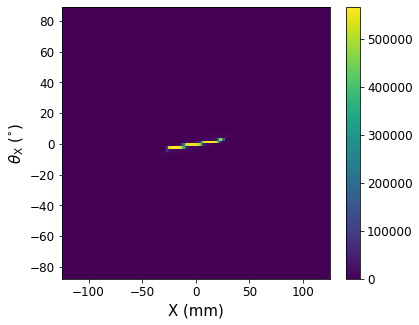

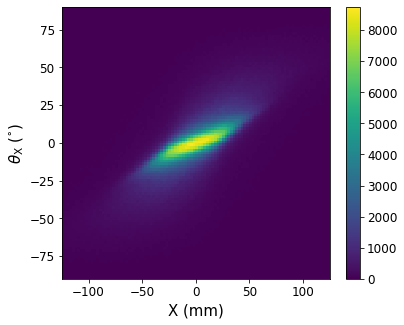

In [55]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    weights_array=np.ones(len(df['X']))
    weights_array*=SF_PS2[j]
    _=plt.hist2d(df['X'],df['thetaX'],bins=(100,100))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('X (mm)')

    plt.ylabel(r'$\theta_{\rm{X}}$ ($^{\circ}$)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]
    if "amma" in files_g:
        particle="gamma"
    else:
        particle="electron"
    savename=f"../PaperImages/Phase2_e_{fieldsize}XthetaX_{particle}.png"
    fig.savefig(savename)

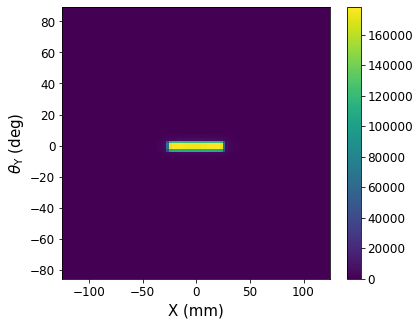

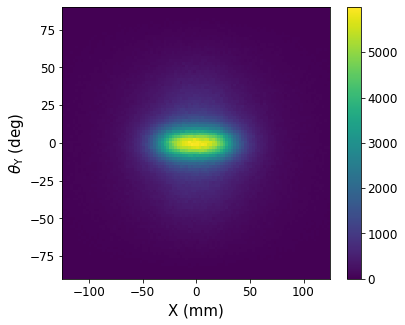

In [50]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    weights_array=np.ones(len(df['X']))
    weights_array*=SF_PS2[j]
    _=plt.hist2d(df['X'],df['thetaY'],weights=weights_array,bins=(100,100))#,vmax=8100
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('X (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$ (deg)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]
    if "amma" in files_g:
        particle="gamma"
    else:
        particle="electron"
    savename=f"../PaperImages/Phase2_e_{fieldsize}XthetaY_{particle}.png"
    fig.savefig(savename)

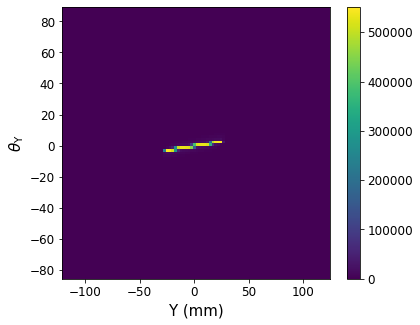

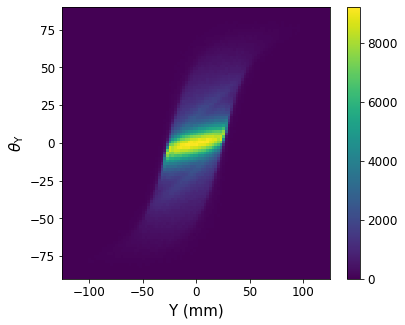

In [51]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    weights_array=np.ones(len(df['X']))
    weights_array*=SF_PS2[j]
    _=plt.hist2d(df['Y'],df['thetaY'],weights=weights_array,bins=(100,100))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('Y (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]
    if "amma" in files_g:
        particle="gamma"
    else:
        particle="electron"
    savename=f"../PaperImages/Phase2_e_{fieldsize}YthetaY_{particle}.png"
    fig.savefig(savename)


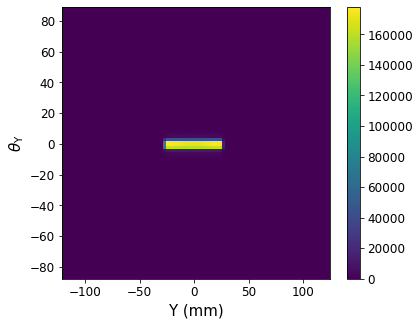

../PaperImages/Phase2_e_10x10YthetaX_gamma.png


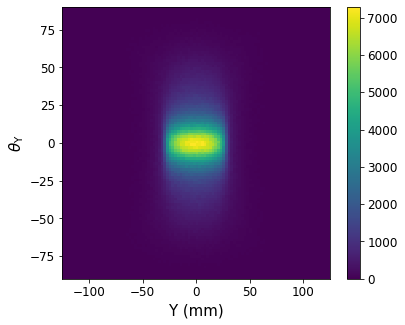

../PaperImages/Phase2_e_10x10YthetaX_electron.png


In [52]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    weights_array=np.ones(len(df['X']))
    weights_array*=SF_PS2[j]
    _=plt.hist2d(df['Y'],df['thetaX'],weights=weights_array,bins=(100,100))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('Y (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]
    if "amma" in files_g:
        particle="gamma"
    else:
        particle="electron"
    savename=f"../PaperImages/Phase2_e_{fieldsize}YthetaX_{particle}.png"
    print(savename)
    fig.savefig(savename)


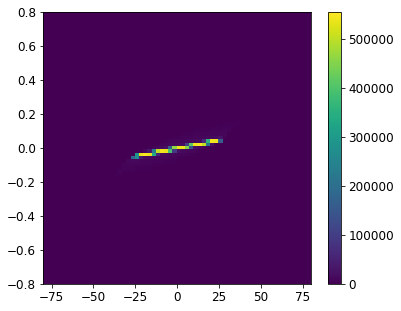

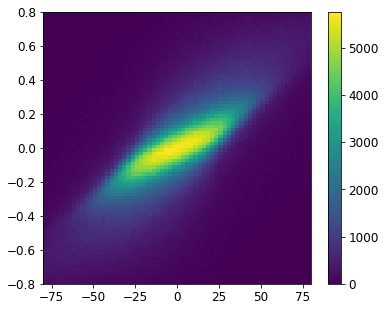

In [53]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(6,5))
    df=data_frame_dict[files_g]
    weights_array=np.ones(len(df['X']))
    weights_array*=SF_PS2[j]
    
    _=plt.hist2d(df['X'],df['dX'],weights=weights_array,bins=(100,100))
    #using _ just suppresses the output of plt.hist2d
    plt.xlim(-80,80)
    plt.ylim(-0.8,0.8)
    plt.colorbar()
    plt.show()


[1.14821308e-02 3.56231324e-02 1.66093406e-01 3.52174612e-01
 4.58803837e-01 5.01937340e-01 5.50118660e-01 5.02898030e-01
 4.88831686e-01 4.74488461e-01 4.54574075e-01 4.36286359e-01
 4.19012821e-01 4.00242663e-01 3.82417462e-01 3.65212096e-01
 3.47413115e-01 3.32210933e-01 3.16660554e-01 3.02127499e-01
 2.88718745e-01 2.75015281e-01 2.62707754e-01 2.49754174e-01
 2.39143586e-01 2.27206281e-01 2.17680140e-01 2.06748623e-01
 1.98026902e-01 1.90694825e-01 1.81835713e-01 1.73184261e-01
 1.65883648e-01 1.59118966e-01 1.50932127e-01 1.46174824e-01
 1.40040463e-01 1.33322976e-01 1.27990938e-01 1.22912707e-01
 1.18066258e-01 1.13134857e-01 1.08057674e-01 1.04199183e-01
 1.00251545e-01 9.63678833e-02 9.21223895e-02 8.74951370e-02
 8.52643650e-02 8.09318218e-02 7.83350228e-02 7.51194389e-02
 7.15588037e-02 6.81429012e-02 6.61816677e-02 6.32891105e-02
 5.97484023e-02 5.81605373e-02 5.48107085e-02 5.26764249e-02
 4.99632104e-02 4.77995608e-02 4.47591245e-02 4.28272570e-02
 4.00731398e-02 3.761478

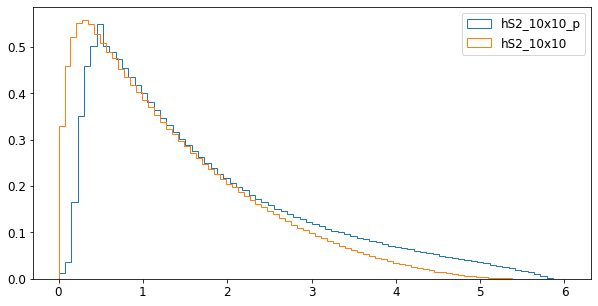

In [47]:
fig,ax=plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Ekine'],density=True,histtype='step',bins=(80),label=files_g[30:-33])
        print(f"{y} and x {midpoints(x)}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()
fig.savefig("Phase2_Ekine_all.png")


    

In [ ]:
print("hi")

In [ ]:
nbins=80
for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Ekine'],density=True,histtype='step',bins=(nbins))
        mpy=midpoints(x)

#         print(f"{midpoints(y)} and x {x}")
        
        for ij in range(0,nbins):
            print(f"/gate/source/mybeam/gps/hist/point {mpy[ij]} {x[ij]}")

In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['X'],df['Y'],bins=(50,50),weights=df['Weight'],vmax=6000)
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(8,4))
    df=data_frame_dict[files_g]
    
    _=plt.hist2d(df['X'],df['dX'],weights=df['Weight'],bins=(100,100),vmax=3050)
    #using _ just suppresses the output if plt.hist2d
    plt.xlim(-80,80)
    plt.ylim(-0.8,0.8)
    plt.colorbar()
    plt.show()


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(8,4))
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['Ekine'],df['dX'],weights=df['Weight'],bins=(300,50))
#     plt.xlim(-80,80)
#     plt.ylim(-0.7,0.7)
    plt.colorbar()
    plt.show()


In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['X'],histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()


    

In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Y'],histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()


In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Y'],histtype='step',bins=(80),label=files_g[30:-33])
        y,x,_=plt.hist(df['X'],histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()

In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Ekine'],density=True,histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
plt.ylim(0.001,1.2)
plt.show()

for j,yi in enumerate(y):
    print(f"/gate/source/mybeam/gps/hist/point {x[j]:.4f} {y[j]*1000:.2f}")
    
    
    

In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:

        _=plt.hist(data_frame_dict[files_g]['X'],weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(80),label=files_g[30:-13])

plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()


In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:

    _=plt.hist(data_frame_dict[files_g]['dX'][data_frame_dict[files_g]['X']<40][data_frame_dict[files_g]['X']>30],histtype='step',bins=(80),label=files_g[30:-13])

plt.yscale('log')
plt.legend(loc="upper left")
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()


# Electron

In [2]:
filenames_e=[
#             "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_Elec_v3/output*1.root",\
#             "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_Elec_v3/output*1.root",\
#             "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_Elec_v3/output*1.root",\
#             "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_Elec_v3/output*1.root",\
            "/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1/output11.root",\
            "/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_ElecFromPhS1/output11.root",\
            "/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_ElecFromPhS1/output11.root",\
            "/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_ElecFromPhS1/output11.root"

]


data_frame_dict={}

for files_g in filenames_e:
    print(f"{files_g}   \n")

    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ProductionVolume'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)
#     if ("10x10" in files_g):
#         filename2="/work/lb8075/PhaseSpaces/PhS2_10x10_p1_ElecFromPhS1/output1*.root"
#         ur2=uproot.pandas.iterate(filename2, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ProductionVolume'])
#         mylist2=list(ur2)
#         mylist+=mylist2
#     print(mylist)
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is


/work/lb8075/PhaseSpaces/PS2/PhS2_10x10_p1_ElecFromPhS1/output11.root   

/work/lb8075/PhaseSpaces/PS2/PhS2_20x20_p1_ElecFromPhS1/output11.root   

/work/lb8075/PhaseSpaces/PS2/PhS2_30x30_p1_ElecFromPhS1/output11.root   

/work/lb8075/PhaseSpaces/PS2/PhS2_40x40_p1_ElecFromPhS1/output11.root   



In [3]:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
for j,files_g in enumerate(filenames_e):
    df=data_frame_dict[files_g]
    df['dZ2']=1-(pow(data_frame_dict[files_g]['dX'],2)+pow(data_frame_dict[files_g]['dY'],2))


In [ ]:
for j,files_g in enumerate(filenames_e):
    df=data_frame_dict[files_g]
    print((df['dZ2']<0).values.sum())
    df.loc[df['dZ2'] < 0]
    data_frame_dict[files_g]=df

In [6]:
# for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
for j,files_g in enumerate(filenames_e):

    df=data_frame_dict[files_g]
    data_frame_dict[files_g]['dZ']=np.sqrt(data_frame_dict[files_g]['dZ2'])
    data_frame_dict[files_g]['dXdY']=(data_frame_dict[files_g].dX**2+data_frame_dict[files_g].dY**2)**0.5
    ratioThetaXY=data_frame_dict[files_g].dXdY/data_frame_dict[files_g].dZ
    ratioThetaX=data_frame_dict[files_g].dX/data_frame_dict[files_g].dZ
    ratioThetaY=data_frame_dict[files_g].dY/data_frame_dict[files_g].dZ
    data_frame_dict[files_g]['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaY']=ratioThetaY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['XY']=(data_frame_dict[files_g].X**2+data_frame_dict[files_g].Y**2)**0.5

In [7]:
for j,files_g in enumerate(filenames_e):
#     print(j)
    print(df.isnull().values.sum)


<built-in method sum of numpy.ndarray object at 0x7fde67f4db70>
<built-in method sum of numpy.ndarray object at 0x7fde67f4db70>
<built-in method sum of numpy.ndarray object at 0x7fdda7846ad0>


In [8]:
for j,files_g in enumerate(filenames_e):

    df=data_frame_dict[files_g]
    df=df.dropna(axis='index')


In [9]:
file = uproot.open("/work/lb8075/PhaseSpaces/PhS2_40x40_p1_Elec_v3/output3.root")
# print(file.keys())
print(file['PhaseSpace'].keys())


[b'AtomicNumber', b'Ekine', b'Weight', b'Mass', b'X', b'Y', b'Z', b'dX', b'dY', b'dZ', b'ParticleName', b'ProductionVolume', b'CreatorProcess', b'ProcessDefinedStep', b'TrackID', b'ParentID', b'EventID', b'RunID', b'TOut', b'TProd']


In [5]:
for files_g in filenames_e:
        df=data_frame_dict[files_g]
        print(df['ProductionVolume'].count())

1502
8155
18375
29892


In [9]:
for files_g in filenames_e:
        df=data_frame_dict[files_g]
        print(df['ProductionVolume'].value_counts())

b'world_log'         2255
b'jaws_x1_log'       1924
b'jaws_x2_log'       1875
b'mlc_leaf_log'       463
b'mlc_y6_log'         248
b'mlc_y5_log'         212
b'mlc_y7_log'         185
b'mlc_y3_log'         167
b'mlc_y4_log'         133
b'mlc_y2_log'         119
b'jaws_y1_log'        113
b'jaws_y2_log'        112
b'mlc_y8_log'         111
b'mlc_y1_log'          72
b'mlc_y9_log'          65
b'mlc_y0_log'          60
b'jaws_x2Vol_log'      26
b'mlc_y10_log'         26
b'jaws_x1Vol_log'      26
b'mlc_y11_log'         15
b'mlc_system_log'       6
b'jaws_y1Vol_log'       3
b'mlc_y13_log'          2
b'mlc_y12_log'          1
Name: ProductionVolume, dtype: int64
b'world_log'         11124
b'jaws_x1_log'        5184
b'jaws_x2_log'        5085
b'mlc_leaf_log'       3226
b'mlc_y9_log'         1226
b'mlc_y8_log'         1177
b'mlc_y7_log'         1170
b'mlc_y6_log'         1131
b'mlc_y5_log'          823
b'mlc_y10_log'         816
b'mlc_y4_log'          715
b'mlc_y3_log'          690
b'mlc_y2_log'  

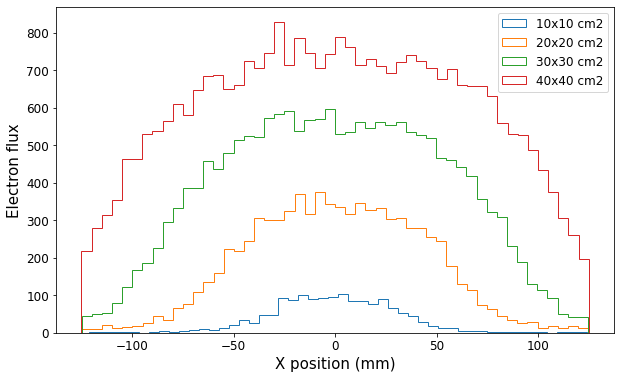

In [3]:
nbins=50
plt.figure(figsize=(10,6))
for files_g in filenames_e:
    df=data_frame_dict[files_g]
    _=plt.hist(df['X'],bins=nbins,histtype='step',label=f"{files_g[34:39]} cm2")
    plt.xlabel('X position (mm)')
    plt.ylabel('Electron flux')

    plt.legend()


In [ ]:
nbins=50
for files_g in filenames_e:
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype('str')
#     print(df['ProductionVolume'].dtypes)
#     print(df['ProductionVolume'].str.contains('jaws_y').sum())    
    y_jawx,x_jawx,_=plt.hist(df['Ekine'][df['ProductionVolume'].str.contains('jaws_x')],histtype='step',bins=nbins,density=True,label="jaws_x")
    y_jawy,x_jawy,_=plt.hist(df['Ekine'][df['ProductionVolume'].str.contains('jaws_y')],histtype='step',bins=nbins,density=True,label="jaws_y")
    y_mlc,x_mlc,_=plt.hist(df['Ekine'][df['ProductionVolume'].str.contains('mlc')],histtype='step',bins=nbins,density=True,label="mlc")
    y_world,x_world,_=plt.hist(df['Ekine'][df['ProductionVolume'].str.contains('world')],histtype='step',bins=nbins,density=True,label="world")
    mpx_jawx=midpoints(x_jawx)
    mpx_jawy=midpoints(x_jawy)
    mpx_mlc=midpoints(x_mlc)
    mpx_world=midpoints(x_world)

#         print(f"{midpoints(y)} and x {x}")
        
    for ij in range(0,nbins):
        print(f"/gate/source/mybeam/gps/hist/point {mpx_jawx[ij]:.4f} {y_jawx[ij]*1000:.4f}")
        
    for ij in range(0,nbins):
        print(f"/gate/source/mybeam/gps/hist/point {mpx_jawy[ij]:.4f} {y_jawy[ij]*1000:.4f}")
        
    for ij in range(0,nbins):
        print(f"/gate/source/mybeam/gps/hist/point {mpx_mlc[ij]:.4f} {y_mlc[ij]*1000:.4f}")
        
    for ij in range(0,nbins):
        print(f"/gate/source/mybeam/gps/hist/point {mpx_world[ij]:.4f} {y_world[ij]*1000:.4f}")
    plt.legend()
    plt.show()

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(2,2,figsize=(5,5))
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype('str')
#     print(df['ProductionVolume'].dtypes)
#     print(df['ProductionVolume'].str.contains('jaws_y').sum())    
    ax[0,0].hist2d(df['X'][df['ProductionVolume'].str.contains('jaws_x')],df['Y'][df['ProductionVolume'].str.contains('jaws_x')],bins=(50,50),label="jaws_y")
    ax[0,1].hist2d(df['X'][df['ProductionVolume'].str.contains('jaws_y')],df['Y'][df['ProductionVolume'].str.contains('jaws_y')],bins=(50,50),label="jaws_y")
    ax[1,1].hist2d(df['X'][df['ProductionVolume'].str.contains('mlc')],df['Y'][df['ProductionVolume'].str.contains('mlc')],bins=(50,50),label="mlc")
    ax[1,0].hist2d(df['X'][df['ProductionVolume'].str.contains('world')],df['Y'][df['ProductionVolume'].str.contains('world')],bins=(50,50),label="world")
#     plt.legend()
    plt.show()

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(2,2,figsize=(5,5))
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype('str')
#     print(df['ProductionVolume'].dtypes)
#     print(df['ProductionVolume'].str.contains('jaws_y').sum())    
    ax[0,0].hist2d(df['X'][df['ProductionVolume'].str.contains('jaws_x')],df['thetaX'][df['ProductionVolume'].str.contains('jaws_x')],bins=(50,50),label="jaws_y")
    ax[0,1].hist2d(df['X'][df['ProductionVolume'].str.contains('jaws_y')],df['thetaX'][df['ProductionVolume'].str.contains('jaws_y')],bins=(50,50),label="jaws_y")
    ax[1,1].hist2d(df['X'][df['ProductionVolume'].str.contains('mlc')],df['thetaX'][df['ProductionVolume'].str.contains('mlc')],bins=(50,50),label="mlc")
    ax[1,0].hist2d(df['X'][df['ProductionVolume'].str.contains('world')],df['thetaX'][df['ProductionVolume'].str.contains('world')],bins=(50,50),label="world")
#     plt.legend()
    plt.show()

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(2,2,figsize=(5,5))
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype('str')
#     print(df['ProductionVolume'].dtypes)
#     print(df['ProductionVolume'].str.contains('jaws_y').sum())    
    ax[0,0].hist2d(df['Y'][df['ProductionVolume'].str.contains('jaws_x')],df['thetaY'][df['ProductionVolume'].str.contains('jaws_x')],bins=(50,50),label="jaws_y")
    ax[0,1].hist2d(df['Y'][df['ProductionVolume'].str.contains('jaws_y')],df['thetaY'][df['ProductionVolume'].str.contains('jaws_y')],bins=(50,50),label="jaws_y")
    ax[1,1].hist2d(df['Y'][df['ProductionVolume'].str.contains('mlc')],df['thetaY'][df['ProductionVolume'].str.contains('mlc')],bins=(50,50),label="mlc")
    ax[1,0].hist2d(df['Y'][df['ProductionVolume'].str.contains('world')],df['thetaY'][df['ProductionVolume'].str.contains('world')],bins=(50,50),label="world")
#     plt.legend()
    plt.show()

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(2,2,figsize=(5,5))
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype('str')
#     print(df['ProductionVolume'].dtypes)
#     print(df['ProductionVolume'].str.contains('jaws_y').sum())    
    ax[0,0].hist2d(df['X'],df['Y'],bins=(50,50),label="jaws_y")
    ax[0,1].hist2d(df['X'],df['Y'],bins=(50,50),label="jaws_y")
    ax[1,1].hist2d(df['X'],df['Y'],bins=(50,50),label="mlc")
    ax[1,0].hist2d(df['X'],df['Y'],bins=(50,50),label="world")
#     plt.legend()
    plt.show()

In [ ]:
nbins=25
for files_g in filenames_e:
        df=data_frame_dict[files_g]
#         print(df['ProductionVolume'].value_counts())
        plt.subplots(1,1,figsize=(12,6))
        plt.hist(df['Ekine'][df['ProductionVolume']==b'world_log'],bins=nbins,histtype='step',density=True,label='world_log')
#         plt.hist(df['Ekine'][df['ProductionVolume']==b'jaws_x1_log'],bins=nbins,histtype='step',density=True,label='jaws_x1_log')
        plt.hist(df['Ekine'][df['ProductionVolume']==b'mlc_y6_log'],bins=nbins,histtype='step',density=True,label='mlc_y6_log')
#         plt.hist(df['Ekine'][df['ProductionVolume']==b'mlc_y5_log'],bins=nbins,histtype='step',density=True,label='mlc_y6_log')
        plt.hist(df['Ekine'][df['ProductionVolume']==b'mlc_leaf_log'],bins=nbins,histtype='step',density=True,label='mlc_leaf_log')
#         plt.hist(df['Ekine'][df['ProductionVolume']==b'jaws_y2_log'],bins=nbins,histtype='step',density=True,label='jaws_y2_log')
        plt.legend()
        plt.show()

#         df['Ekine'][df['X']>1].hist()
    
#         y,x,_=plt.hist(df['Ekine'][df['ProductionVolume']],density=True,histtype='step',bins=(nbins))
#         mpy=midpoints(x)

# #         print(f"{midpoints(y)} and x {x}")
        
#         for ij in range(0,nbins):
#             print(f"/gate/source/mybeam/gps/hist/point {mpy[ij]} {y[ij]*1000}")

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist(df['thetaY'],bins=50)

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist(df['Y'],bins=50)
    plt.show()

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['Y'],df['X'],bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('Y (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$ ($^{\circ}$)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]

    savename=f"Phase2_e_{fieldsize}XthetaX.png"
    fig.savefig(savename)

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['Y'],df['thetaY'],bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('Y (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$ ($^{\circ}$)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]

    savename=f"Phase2_e_{fieldsize}XthetaX.png"
    fig.savefig(savename)

In [ ]:
for files_g in filenames_e:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['X'],df['thetaX'],bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('Y (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$ ($^{\circ}$)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]

    savename=f"Phase2_e_{fieldsize}XthetaX.png"
    fig.savefig(savename)

In [ ]:
nbins=80
for files_g in filenames_e:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Ekine'],density=True,histtype='step',bins=(nbins))
        mpy=midpoints(x)

#         print(f"{midpoints(y)} and x {x}")
        
        for ij in range(0,nbins):
            print(f"/gate/source/mybeam/gps/hist/point {mpy[ij]} {y[ij]*1000}")

In [ ]:

data_frame_dict={}

for files_g in filenames_e:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ProductionVolume','CreatorProcess'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



In [ ]:
for files_g in filenames_e:
    sub_area=data_frame_dict[files_g]['X'][abs(data_frame_dict[files_g]['X'])<20][abs(data_frame_dict[files_g]['Y'])<20].count()
    total_area=data_frame_dict[files_g]['X'].count()
    print(sub_area,total_area,sub_area/total_area)

In [ ]:
for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    print(data_frame_dict[files_g].groupby('ProductionVolume')['Weight'].sum())


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(19,4))
# creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    np2=df['CreatorProcess'].to_numpy(dtype="str")
    np3=df['Weight'].to_numpy(dtype="float16")
    np2=np2.astype('str')
    print(np2.dtype)
    print(np3.dtype)

# plt.hist(df['ProductionVolume'])
# print(df.dtypes)
# df['ProductionVolume']=df['ProductionVolume'].astype('str')
# print(df.dtypes)

#     df['Weight'].astype('float16')
# print(df.dtypes)

# print(df2)
# _=plt.hist(df3)
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.colorbar()
# plt.show()
# df2=df['ProductionVolume']
# print(df['ProductionVolume'].dtypes)
# df['ProductionVolume']=df['ProductionVolume'].astype('str')
# print(df['ProductionVolume'].dtypes)

#     df['CreatorProcess'].value_counts().plot(kind='bar',logy=True, ylim=(1,5500000))
    plt.hist2d(np2,np3)

## Inspecting phase 1A

In [ ]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root",\
            "/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias1_3.root"
]

#ran 10x more bias 1 than bias 100

In [ ]:
data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ParticleName','ProductionVolume','CreatorProcess'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



In [ ]:
for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    print(data_frame_dict[files_g].groupby('ProductionVolume')['Weight'].sum())


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(10,5))
    print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
    df['CreatorProcess']=df['CreatorProcess'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    (df['CreatorProcess'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    

In [ ]:
plt.subplots(1,1,figsize=(10,5))
print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
(df['ParticleName'][df['Weight']<0.5]).value_counts().plot(kind='bar',logy=True,ylim=(1,10000000))
                   
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(10,5))
    print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    (df['ParticleName'][df['Weight']>0.5]).value_counts().plot(kind='bar',logy=True,ylim=(1,10000000))
    

In [ ]:
plt.subplots(1,1,figsize=(7,3))
print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
(df['ProductionVolume'][df['Weight']<0.5]).value_counts().plot(kind='bar',sort_columns=True)
    
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(7,3))
    print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar',sort_columns=True)
    

In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(10,5))

#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
#     df['ProductionVolume']=df['ProductionVolume'].astype("str")

    df['Weight'].hist()

In [ ]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['X'].count())

In [ ]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['Weight'].value_counts())

In [ ]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    if j==0:
        col="cyan"
    else:
        col="magenta"
    plt.hist(df['X'],density=True,weights=df['Weight'],histtype='step',color=col)

In [ ]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    if j==0:
        col="cyan"
    else:
        col="magenta"
    plt.hist(df['Ekine'],density=True,weights=df['Weight'],histtype='step',color=col)

In [ ]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    if j==0:
        col="cyan"
    else:
        col="magenta"
    plt.hist(df['X'][df['Y']<1],density=True,weights=df['Weight'][df['Y']<1],histtype='step',color=col)

In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    plt.hist2d(df['X'][df['ParticleName']==b'gamma'],df['Y'][df['ParticleName']==b'gamma'],weights=df['Weight'][df['ParticleName']==b'gamma'],bins=(60,60))

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
dfsubgamma=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['Weight']>0.5][df['ParticleName']==b"gamma"]
dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
df
# dfsubgamma=df[df['CreatorProcess']==b'eBrem']
# dfsubgamma

In [ ]:
dfsubgamma=df[df['ProductionVolume']==b'target_log'][df['Weight']>0.5][df['ParticleName']==b'gamma']
dfsubgamma

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
dfsubelec=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['Weight']>0.5][df['ParticleName']==b"e-"]
dfsubelec["ProductionVolume"].value_counts().plot(kind='bar')

In [ ]:
pd.set_option('display.max_rows',1000)


In [ ]:
df1=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias1_3.root"]
dfsubgamma=df1[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df1['ParticleName']==b"gamma"]
dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)


In [ ]:
# plt.subplots(1,1,figsize=(15,10))

for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    dfsubgamma=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['ParticleName']==b"gamma"]
    # dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)
    print(dfsubgamma.groupby('ProductionVolume')['Weight'].value_counts())
    print("")

In [ ]:
plt.subplots(1,1,figsize=(10,4))
df["ProductionVolume"][df['ParticleName']==b"gamma"].hist(histtype='bar', weights=df['Weight'][df['ParticleName']==b"gamma"])

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
dfsubgamma=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['ParticleName']==b"gamma"]
# dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)[df['ParticleName']==b"gamma"]
df["ProductionVolume"][df['ParticleName']==b"gamma"].hist(histtype='bar', weights=df['Weight'][df['ParticleName']==b"gamma"])

In [ ]:
plt.subplots(1,1,figsize=(15,10))

for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    print(files_g)
    if j==0:
        col="cyan"
        factor=10
    else:
        col="magenta"
        factor=1
    df["ProductionVolume"][df['ParticleName']==b"gamma"].hist(histtype='step',log=True, weights=factor*df['Weight'][df['ParticleName']==b"gamma"],color=col)

In [ ]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/output-PhS_bias1_76.root"
]

In [ ]:
data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','dZ','Weight','Ekine','ProductionVolume','CreatorProcess'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is


In [ ]:
for j,files_g in enumerate(filenames_g):

    df=data_frame_dict[files_g]
    data_frame_dict[files_g]['dXdY']=(data_frame_dict[files_g].dX**2+data_frame_dict[files_g].dY**2)**0.5
    ratioThetaXY=data_frame_dict[files_g].dXdY/data_frame_dict[files_g].dZ
    ratioThetaX=data_frame_dict[files_g].dX/data_frame_dict[files_g].dZ
    ratioThetaY=data_frame_dict[files_g].dX/data_frame_dict[files_g].dZ
    data_frame_dict[files_g]['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaY']=ratioThetaY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['XY']=(data_frame_dict[files_g].X**2+data_frame_dict[files_g].Y**2)**0.5


In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    plt.hist2d(df['X'],df['Y'],weights=df['Weight'],bins=(60,60))
    plt.colorbar()

In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    _=plt.hist2d(df['X'][df['Y']<10][df['Y']>-10],df['thetaX'][df['Y']<10][df['Y']>-10],weights=df['Weight'][df['Y']<10][df['Y']>-10],bins=(200,200))
    plt.ylim(-30,30)
    plt.colorbar()

In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    _=plt.hist2d(df['XY'],df['thetaXY'],weights=df['Weight'],bins=(100,200))
    plt.ylim(-20,0)
    plt.colorbar()